## Предварительный анализ данных

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования

📌Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

### Импорт библиотек и изучение общей информации

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
Other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


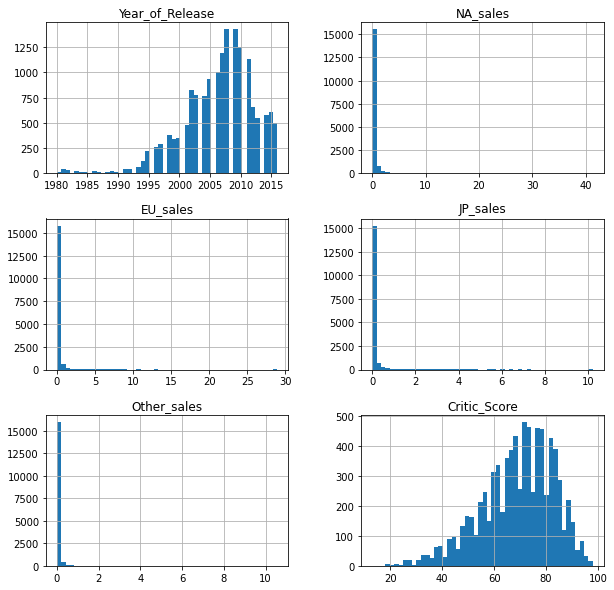

In [3]:
display(data.head(10))
data.info()
display(data.describe(include='all').T)
data.hist(bins=50, figsize=(10, 10));

### ✅ Вывод:
* Датасет содержит 16715 строк и 11 колонок
* С 1980 по 2016 годы было выпущено 11559 игр
* Оценка критиков колеблется в диапазоне от 45 до 90 баллов, оценок ниже 45 сравнительно мало. Минимальный балл – 13
* Нужно привести названия столбцов к единому регистру
* В данных есть проблемы с пропусками, в **Critic_Score**, **User_Score** и **Rating** пропущено более 40% значений
* Столбцы **Year_of_Release** и **Critic_Score** необходимо привести к типу int, а столбец **User_Score** к float

## Предобработка данных

In [4]:
# сохраним в переменную первоначальное количество строк
old_data_shape = data.shape[0]

# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

# приведем названия жанров к нижнему регистру
data['genre'] = data['genre'].str.lower()

In [5]:
# выявим проблемные столбцы
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Работа с дубликатами и пропусками

In [6]:
# проверим наличие явных дубликатов
data.duplicated().sum()

0

In [7]:
# проверим наличие неявных дубликатов
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,E


* Наблюдаются дубликаты в строках Sonic the Hedgehog и Madden NFL 13. Чтобы не потерять точное значение продаж, добавим в первую строку в колонку **eu_sales** недостающие значения  из второй строки 
* Need for Speed: Most Wanted трогать не будем, так как это две части игры, вышедшие в 2005 и 2012 году, просто под одним и тем же названием

In [8]:
# прибавляем к первой строке продажи из второй строки
data.loc[data['name'] == 'Sonic the Hedgehog', 'eu_sales'] = 0.54

data.loc[data['name'] == 'Madden NFL 13', 'eu_sales'] = 0.23

# удаляем дубли Sonic the Hedgehog и Madden NFL 13
data.drop(labels=[4127, 16230], axis=0, inplace=True)

In [9]:
# проверим наличие аномалий
display(data['year_of_release'].sort_values().unique())

display(data['genre'].sort_values().unique())

display(data['critic_score'].sort_values().unique())

display(data['user_score'].sort_values().unique())

display(data['rating'].sort_values().unique())

display(data['platform'].sort_values().unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy', nan], dtype=object)

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [10]:
# выбираем игры, с пропусками в рейтинге
data[data['rating'].isna() == True].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16703,Strawberry Nauts,PSV,2016.0,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16705,15 Days,PC,2009.0,adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16707,Aiyoku no Eustia,PSV,2014.0,misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<div><br>🔸Если вручную перебрать хотя бы 4 игры с пропусками в рейтинге ESRB и отметить какие страны их разработали, то можно заметить следующую закономерность:
    <br>
<br>1. В большинстве случаев компания-разработчик либо японская, либо европейская. 
    <br>▪️ Например, Strawberry Nauts – компания Entergram (японская компания по разработке видеоигр) 
<br>▪️ 15 Days – студия House of Tales (немецкий разработчик видеоигр из Бремена)
<br>▪️ Aiyoku no Eustia – студия MAugust (японская студия визуальных новелл)
<br>▪️ Spirits & Spells – студия Kalisto Entertainment (французская компания по разработке видеоигр)</div>

In [11]:
# выделим все платформы Nintendo в отдельную переменную
nintendo_platform = data.query("platform == ['3DS','DS', 'GBA', 'GC', 'N64', 'NES',  'SNES', 'Wii', 'WiiU']")

# выведем сколько выпущено игр на этих платформах
display(
    nintendo_platform.pivot_table(
        index='platform',
        values='name', 
        aggfunc='count')
)

# выведем сколько игр отмечено рейтингом ESRB на этих платформах
display(
    nintendo_platform.pivot_table(index='platform',
                                  values='rating', 
                                  aggfunc='count')
)

,name
platform,
3DS,520
DS,2151
GBA,822
GC,556
N64,319
NES,98
SNES,239
Wii,1320
WiiU,147


,rating
platform,
3DS,228
DS,1273
GBA,522
GC,469
N64,0
NES,0
SNES,0
Wii,1002
WiiU,105


<div>До ESRB рейтинги видеоигр были на уровне производителей консолей. В то время Nintendo не оценивала игры, но имела репутацию цензуры игр, чтобы сделать их удобными для семьи. Поэтому у игр на Nintendo-платформе есть пропуски в рейтинге ESRB.
<br>▪️ Например, на платформе 3DS из 520 игр только 44% игр были отмечены ESRB
<br>▪️ У DS из 2151 игры оценено 59%, а 878 игр остались без внимания
<br>▪️ На платформах N64, NES и SNES рейтинга нет вообще
    <br> 
<br>🔸Аномалий нет, нужно обработать только пропуски и значение 'tbd' в столбце <strong>user_score</strong>
<br>🔸Большое количество пропусков в столбцах с оценками лучше оставить, потому что заполнять средним или медианным значением их нельзя - это сильно исказит выводы.
<br>📌 Причиной пропусков является наличие в Европе и Японии своих организаций, которые занимаются возрастными рейтингами, а именно PEGI  и CERO («Правила CERO невероятно строги и распространяются только на японский рынок, лучше бы их вообще не вводили», – отзываются о системе некоторые разработчики с Запада).
<br>▪️ Из-за различий в способах оценки их в рейтинговых системах нужно добавить отдельные колонки с рейтингами PEGI  и CERO
<br>🔸6676 NaN в рейтинге появились из-за наличия других рейтинговых систем, как мы определили выше. Чтобы такие пропуски отображались на графиках – заполним их значением miss

In [12]:
# заполняем пропуски
data['rating'] = data['rating'].fillna(value='miss')

In [13]:
# проверяем содержимое в строках с пропущенными названиями игр
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,miss
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,miss


<div>🔸Пропуски есть одновременно в названиях и в жанрах, их восстановить не получится. Если не понятно о какой игре идет речь - то такие строки лучше удалить. Так разом избавимся от двух пропущенных значений в столбцах <strong>name</strong> и <strong>genre</strong>
<br>🔸Также очистим столбец <strong>year_of_release</strong>, так как год тоже нельзя заполнить медианой, нужен перебор игр вручную, а это займет достаточно много времени</div>

In [14]:
# сохраняем первоначальный датафрейм на случай, если придумаем, как заполнить годы
old_data_with_missing = data

# удаляем пропуски 
data.dropna(subset=['name', 'year_of_release'], inplace=True)

🔸TBD при оценке игр означает 'To Be Determined', т.е. будет определено позднее. Это означает, что у таких игр еще не набралось достаточное количество пользовательских оценок, а значит по факту нет оценки, и такие пропуски в столбце **user_score** можно заполнить NaN

In [15]:
# заменяем tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', 'NaN')

Посмотрим встречающиеся возрастные категории и их расшифровку:

In [16]:
data['rating'].value_counts(dropna=False)

miss    6676
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

<br>🔹«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
    <br>
<br>🔹«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
    <br>
<br>🔹«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
    <br>
<br>🔹«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены.
    <br>
<br>🔹«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
    <br>
<br>🔹«K-A» (для детей и взрослых) использовалась до 1998 года. Далее он был переименован в «E».
    <br>
<br>🔹«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.
    <br>
<br>🔹«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

In [17]:
# заменим категорию «K-A» на актуальный «E»
data['rating'] = data['rating'].replace('K-A', 'E')

In [18]:
new_data_shape = data.shape[0]
display(f'Всего отсечена {old_data_shape - new_data_shape} строка')

'Всего отсечена 272 строка'

### Преобразование данных в нужные типы

In [19]:
# преобразовываем значения столбца year_of_release в целочисленных тип данных, потому что год не может быть дробным
data['year_of_release'] = data['year_of_release'].astype(int)

# преобразовываем значения столбца critic_score в целочисленных тип данных, потому что критики ставят оценки целыми числами
data['critic_score'] = data['critic_score'].convert_dtypes()

# преобразовываем значения столбца user_score в вещественный тип данных, потому что оценка содержит дробные числа
data['user_score'] = data['user_score'].astype('float64')

### Добавление нового столбца

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [20]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,miss,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,miss,31.38


### ✅ Вывод:
* Данные не содержат аномалий и дубликатов
* Пропуски заполнены там, где это возможно
* Возрастная категория заменена на актуальную
* Столбцы преобразованы в нужный тип данных
* Создан столбец с суммарными продажами
* Причиной пропусков является наличие в Европе и Японии своих рейтинговых систем

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

In [21]:
# проверим наличие дубликатов
data[data.duplicated(subset=['name', 'year_of_release'], keep=False)].head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,miss,14.63
32,Call of Duty: Black Ops,X360,2010,shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68


In [22]:
# удалим дубли, за исключением первой строки, и сохраним в переменную
unique_games = data.drop_duplicates(subset=['name', 'year_of_release'], keep='first').reset_index(drop=True)

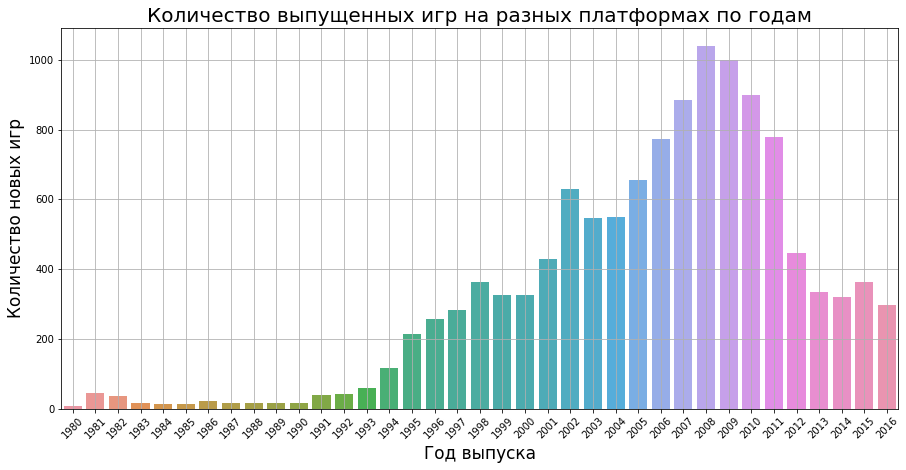

In [23]:
# создаем сводную таблицу с количеством игр в каждом году, будем считать по именам, т.к. они уникальны
pivot_games_by_year = unique_games.pivot_table(index='year_of_release', values='name', aggfunc='count')

# создаем график по сводной таблице
fig, ax = plt.subplots()
sns.barplot(x = pivot_games_by_year.index,
            y = pivot_games_by_year.name)
plt.grid()
plt.title('Количество выпущенных игр на разных платформах по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=17)
plt.ylabel('Количество новых игр', fontsize=17)
plt.xticks(rotation = 45)
fig.set_figwidth(15)
fig.set_figheight(7);

In [24]:
# отсеиваем неинформативные годы
data_after_2001 = data.query('2001 <= year_of_release')

<div>🔸С 2001 года отмечается значительный рост количества новых игр, в 2008 году количество достигает своего пика (более 1000 игр), а с 2009 начинается спад. Возьмем в исследуемый диапазон игры, выпущенные с 2001 по 2016 годы.
<br>🔸Такой спад можно охарактеризовать отсутствием новизны в сфере игр, всевозможные жанры и сюжеты были выпущены ранее, и геймдевам приходится заимствовать многое из старых игр, в попытках добавить что-то оригинальное
<br>🔸Такую динамику также можно связать с появлением онлайн игр. Многие пользователи могут годами играть в одну и ту же онлайн-игру, не интересуясь новыми играми. Из-за этого спрос падает</div>

### Платформы с наибольшими суммарными продажами и  распределением по годам

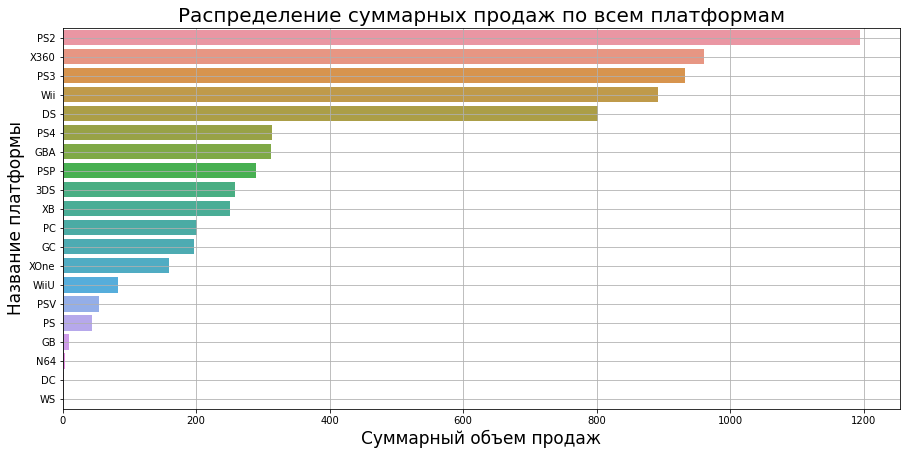

In [25]:
# создаем сводную таблицу с суммарным объемом общих продаж по каждой платформе
pivot_platform = (
    data_after_2001
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

# создаем график по сводной таблице
fig, ax = plt.subplots()
sns.barplot(x = pivot_platform.total_sales,
            y = pivot_platform.index)
plt.grid()
plt.title('Распределение суммарных продаж по всем платформам', fontsize=20)
plt.xlabel('Суммарный объем продаж', fontsize=17)
plt.ylabel('Название платформы', fontsize=17)
fig.set_figwidth(15)
fig.set_figheight(7);

Составим график с распределением по годам для 5 популярных платформ

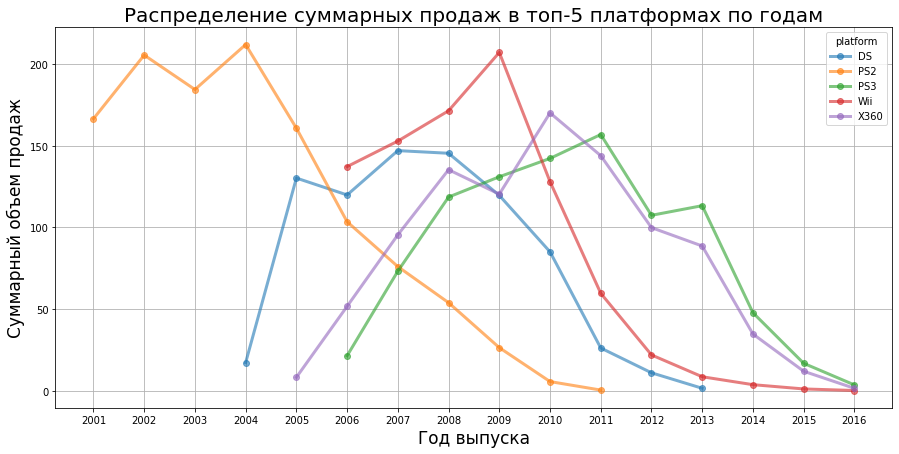

In [26]:
# выделим 5 лучших платформ
top_5 = pivot_platform.index[:5].tolist()
best_platform = data_after_2001.query('platform == @top_5')

# построим график распределения по годам
(
best_platform
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(
        grid = True,
        figsize = (15, 7),
        linewidth = 3,
        style = '-o',
        alpha = 0.6
    )
)
plt.title('Распределение суммарных продаж в топ-5 платформах по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=17)
plt.ylabel('Суммарный объем продаж', fontsize=17)
plt.xticks(np.arange(2001, 2017, 1));

<div>🔸Все платформы, после достижения своего пика популярности, постепенно уходили с рынка, их заменяли более современные модели
<br>🔸Начиная с 2004 года новые платформы появлялись каждый год
<br>🔸PlayStation3 и Nintendo WII были выпущены одновременно – в 2006 году
<br>🔸Nintendo WII ушла с рынка быстрее всех
<br>🔸Примерный срок актуальности платформы 8 лет
<br>🔸Xbox360 и PlayStation3 являются самыми живучими платформами</div>

### Данные за соответствующий актуальный период, которые помогут построить прогноз на 2017 год

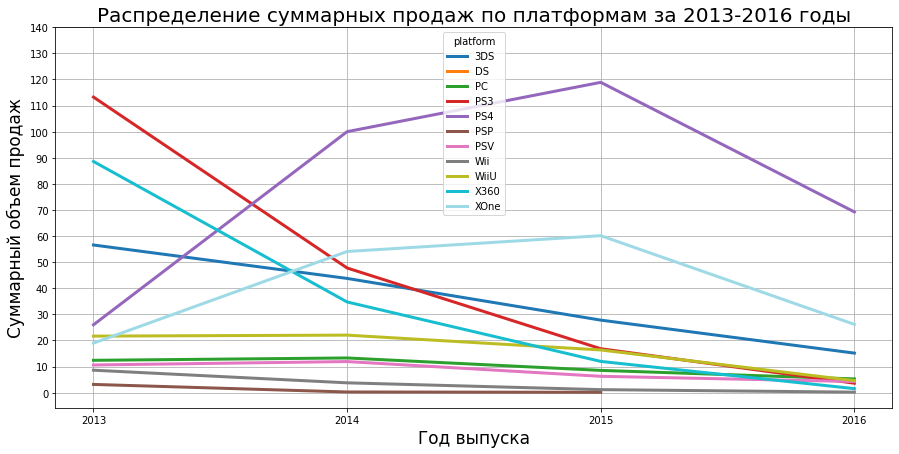

In [27]:
# выделим актуальный период
data_after_2013 = data.query('2013 <= year_of_release')

# построим график распределения по годам
(
data_after_2013
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(
        grid = True,
        figsize = (15, 7),
        linewidth = 3,
        cmap = 'tab20'
    )
)
plt.title('Распределение суммарных продаж по платформам за 2013-2016 годы', fontsize=20)
plt.xlabel('Год выпуска', fontsize=17)
plt.ylabel('Суммарный объем продаж', fontsize=17)
plt.xticks(np.arange(2013, 2017, 1))
plt.yticks(np.arange(0, 150, 10));

<div>🔸За период с 2013 по 2016 годы можно отметить две лидирующие платформы: PS4 и XOne. Для 2017 года они кажутся потенциально прибыльными. Так как игры на этих платформах появились в 2013 году, а средний срок актуальности платформы 8 лет – они должны просуществовать еще примерно 4 года
<br>🔸PSP ушла с рынка в 2015 году
<br>🔸Nintendo WII к 2016 году была уже с нулевыми продажами
<br>🔸У остальных платформ значительно сокращаются объемы продаж, для 2017 года они будут уже не выгодными</div>

In [28]:
# выделим для дальнейшего анализа актуальные для 2017 года платформы
current_platform = data.query('platform == ["PS4", "XOne"]')

### График по глобальным продажам игр в разбивке по платформам

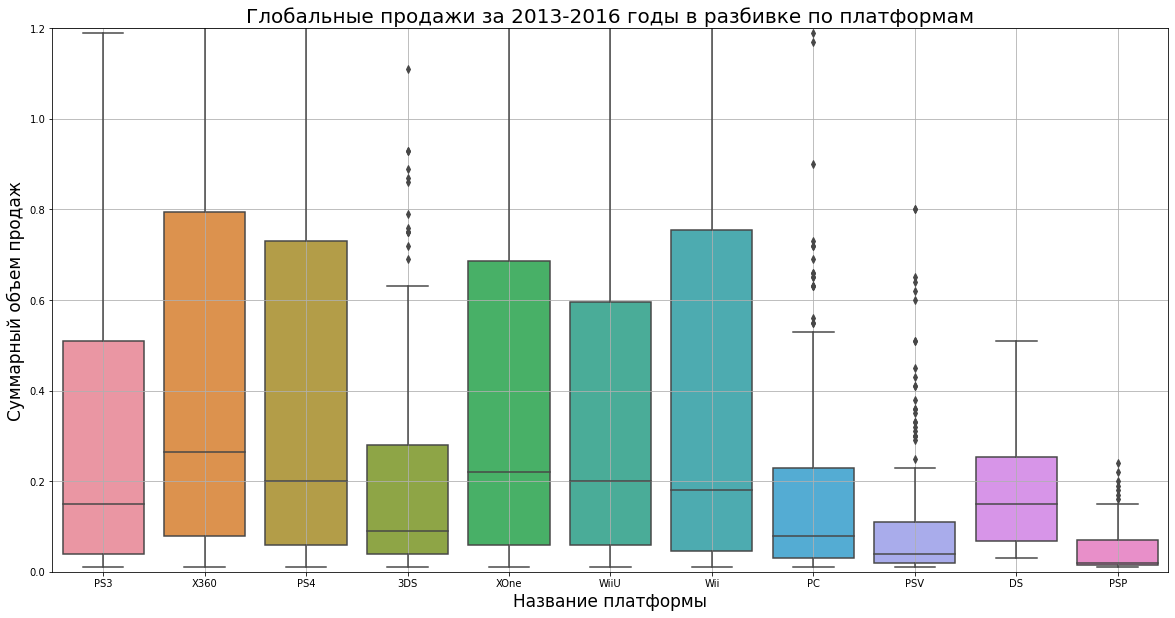

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,639.000000,639.000000,639.000000,639.000000,639.000000,421.000000,439.000000,639.000000
mean,2015.070423,0.315900,0.301534,0.025509,0.097997,72.586698,6.654214,0.740939
std,0.906119,0.603749,0.678088,0.057481,0.210334,12.674880,1.430226,1.416778
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2014.000000,0.015000,0.010000,0.000000,0.010000,66.000000,6.000000,0.060000
50%,2015.000000,0.090000,0.070000,0.000000,0.020000,75.000000,6.900000,0.210000
75%,2016.000000,0.340000,0.270000,0.030000,0.100000,81.000000,7.750000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_after_2013, x='platform', y='total_sales')
plt.grid()
plt.title('Глобальные продажи за 2013-2016 годы в разбивке по платформам', fontsize=20)
plt.xlabel('Название платформы', fontsize=17)
plt.ylabel('Суммарный объем продаж', fontsize=17)
plt.ylim([0, 1.2]);
plt.show()

# посмотрим отдельно на общие продажи двух лучших платформ
current_platform.describe()

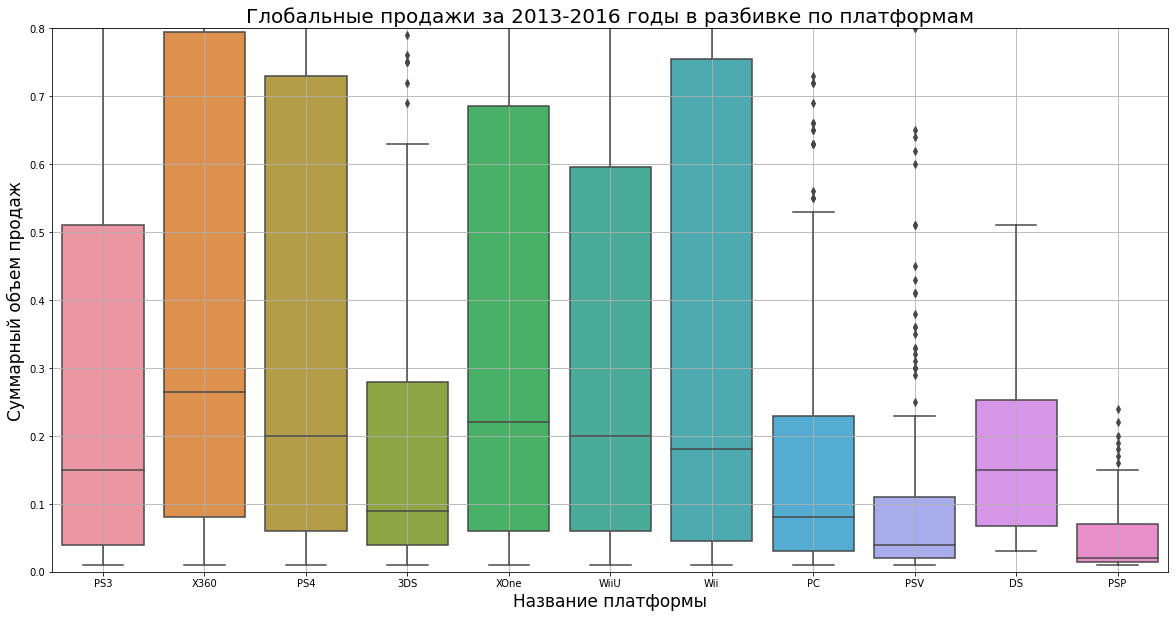

In [30]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_after_2013, x='platform', y='total_sales')
plt.grid()
plt.title('Глобальные продажи за 2013-2016 годы в разбивке по платформам', fontsize=20)
plt.xlabel('Название платформы', fontsize=17)
plt.ylabel('Суммарный объем продаж', fontsize=17)
plt.ylim([0, 0.8]);
plt.show()

<div>🔸Лидирующими платформами по количеству продаж и медианным значениям являются X360, PS4, XOne и Wii
<br>🔸PS4 и XOne, вышедшие в один год, идут на одном уровне по первому квартилю. В среднем их продажи идут на уровне 740 тысяч </div>

### Взаимосвязь между отзывами и продажами

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


'Корреляция между отзывами и продажами на платформе PS4'

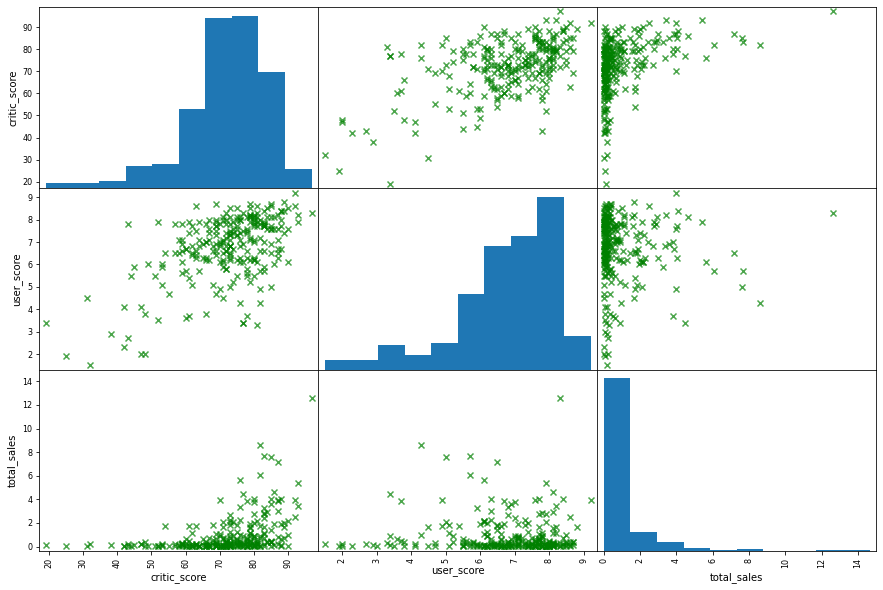

In [31]:
# создаем матрицу корреляций
display(data_after_2013[data_after_2013.platform == "PS4"][['critic_score', 'user_score', 'total_sales']].corr())

# создаем диаграмму рассеяния
pd.plotting.scatter_matrix(
    data_after_2013[data_after_2013.platform == "PS4"][['critic_score', 'user_score', 'total_sales']],
    figsize=(15, 10),
    marker = 'x',
    alpha = 0.7,
    color = 'g'
)
display('Корреляция между отзывами и продажами на платформе PS4')
plt.show();

<div>🔸Корреляция между оценкой критиков и суммарными продажами слабая (0.406568)
<br>🔸Корреляция между оценкой пользователей и суммарными продажами слабая отрицательная (-0.031957), еще меньше чем у критиков, примем за отсутствие взаимосвязи
<br>🔸Корреляция оценки пользователей и оценки критиков 0.557654, можно предположить, что их мнения об определенных играх просто совпадают
<br>🔸Если оценивать по диаграмме рассеяния, то видно, что при низких оценках суммарные продажи тоже на низком уровне. А при росте оценки - количество продаж увеличивается, особенно при оценках критиков </div>

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


'Корреляция между отзывами и продажами на платформе XOne'

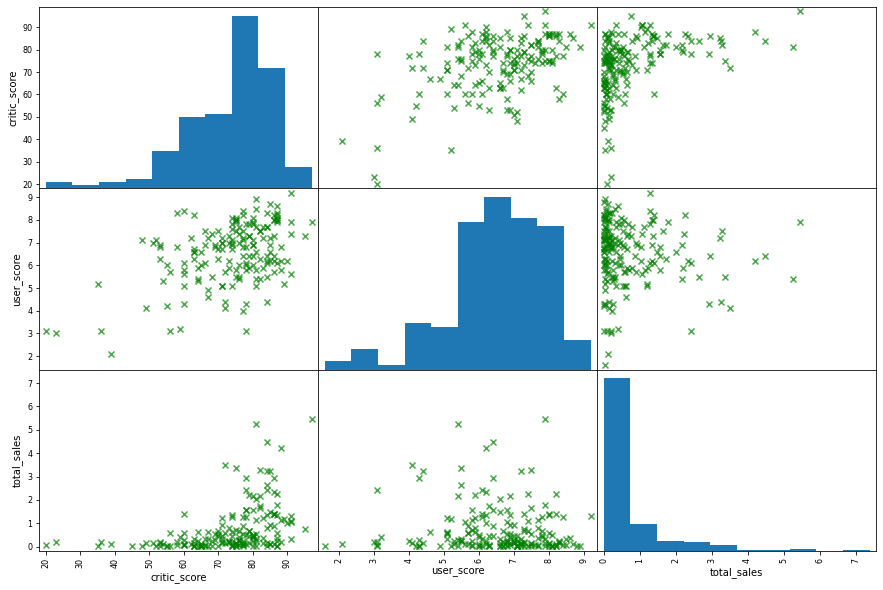

In [32]:
# создаем матрицу корреляций
display(data_after_2013[data_after_2013.platform == "XOne"][['critic_score', 'user_score', 'total_sales']].corr())

# создаем диаграмму рассеяния
pd.plotting.scatter_matrix(
    data_after_2013[data_after_2013.platform == "XOne"][['critic_score', 'user_score', 'total_sales']],
    figsize=(15, 10),
    marker = 'x',
    alpha = 0.7,
    color = 'g'
)
display('Корреляция между отзывами и продажами на платформе XOne')
plt.show();

,critic_score,user_score,total_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
total_sales,0.357057,0.241504,1.000000


'Корреляция между отзывами и продажами на платформе 3DS'

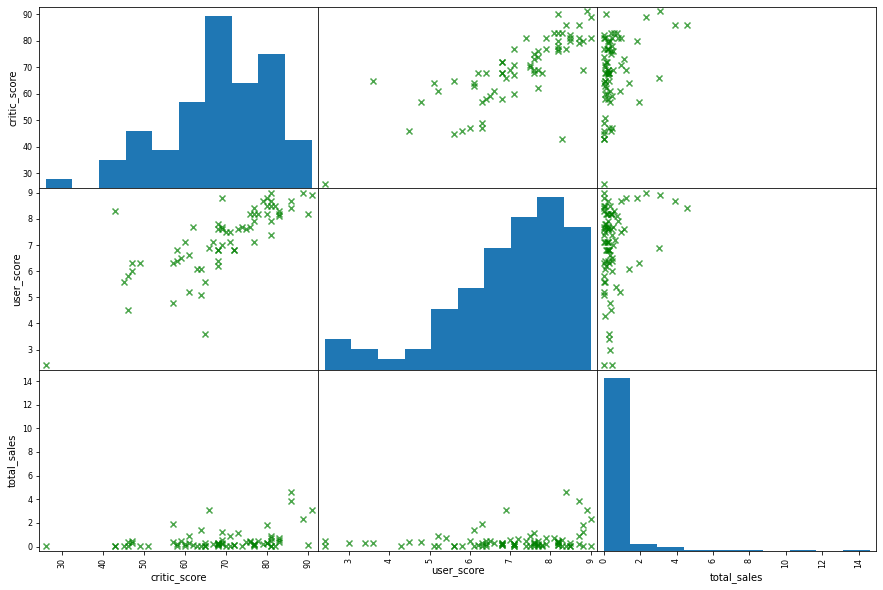

In [33]:
# создаем матрицу корреляций
display(data_after_2013[data_after_2013.platform == "3DS"][['critic_score', 'user_score', 'total_sales']].corr())

# создаем диаграмму рассеяния
pd.plotting.scatter_matrix(
    data_after_2013[data_after_2013.platform == "3DS"][['critic_score', 'user_score', 'total_sales']],
    figsize=(15, 10),
    marker = 'x',
    alpha = 0.7,
    color = 'g'
)
display('Корреляция между отзывами и продажами на платформе 3DS')
plt.show();

<div>🔸На основе анализа платформ XOne и 3DS видим, что  корреляция остается неизменной. Связь между продажами и оценками критиков для платформ является слабой степени выраженности, между оценкой пользователей слабая отрицательная </div>

### Общее распределение игр по жанрам

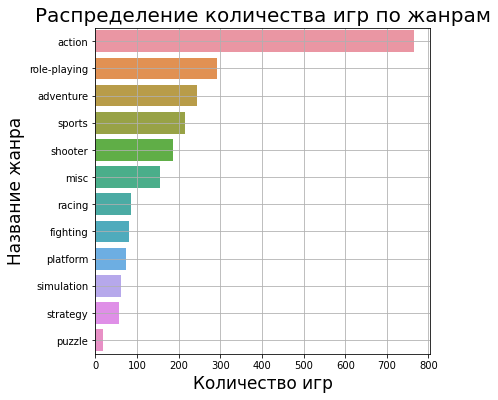

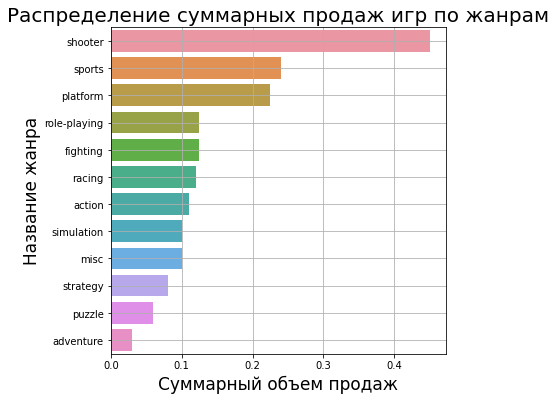

In [34]:
# создаем сводную таблицу с количеством игр в каждом жанре
pivot_genre = (data_after_2013
               .pivot_table(index='genre', values='name', aggfunc='count')
               .sort_values('name', ascending=False)
              )

# создаем график по сводной таблице
fig, ax = plt.subplots()
sns.barplot(x = pivot_genre.name,
            y = pivot_genre.index)
plt.grid()
plt.title('Распределение количества игр по жанрам', fontsize=20)
plt.xlabel('Количество игр', fontsize=17)
plt.ylabel('Название жанра', fontsize=17)
fig.set_figwidth(6)
fig.set_figheight(6);


# создаем сводную таблицу с продажами по каждому жанру
pivot_genre_sales = (data_after_2013
               .pivot_table(index='genre', values='total_sales', aggfunc='median')
               .sort_values('total_sales', ascending=False)
              )

# создаем график по сводной таблице
fig, ax = plt.subplots()
sns.barplot(x = pivot_genre_sales.total_sales,
            y = pivot_genre_sales.index)
plt.grid()
plt.title('Распределение суммарных продаж игр по жанрам', fontsize=20)
plt.xlabel('Суммарный объем продаж', fontsize=17)
plt.ylabel('Название жанра', fontsize=17)
fig.set_figwidth(6)
fig.set_figheight(6);

<div>🔸По количеству игр выделяются жанр экшн, который содержит более 700 игр
<br>🔸Менее 50 игр в категории паззлы
<br>🔸Остальные жанры находятся в промежутке от 50 до 300 игр 
<br>
<br>🔸В топ-3 продаваемых жанра входят шутер, спортивные игры и платформеры
<br>🔸Игр жанра шутер примерно 190, но по продажам он на первом месте, поэтому это перспективный жанр
<br>🔸Жанр экшн, несмотря на такое количество игр, находится всего лишь на 7 месте по продажам
<br>🔸В самом низу продаж три жанра: приключения, паззлы и стратегии </div>

### ✅ Вывод:
* С 2001 года начался значительный рост количества новых игр, а с 2010 отмечается резкий спад
* Примерный срок актуальности платформы 8 лет
* Лидирующими платформами являются PS4 и XOne, они появились в 2013 году, поэтому отсчет начинаем с 2013 года
* При росте оценки - количество продаж увеличивается, особенно при оценках критиков
* В топ-3 продаваемых жанра входят шутер, спортивные игры и платформеры
* Шутеры, несмотря на небольшое количество игр, являются перспективным жанром для продаж, а паззлы наоборот, самый малочисленный не прибыльный жанр


## Портрет пользователя каждого региона

In [35]:
# функция, которая создает сводную таблицу для выбранноого региона и выдает первые 5 индексов
# в нашем случае это будут первые 5 платформ
def sorted_region(column):
    return (
        data_after_2013
        .pivot_table(index=column, values=region, aggfunc='sum')
        .sort_values(region, ascending=False)
        .head(5)
    )

# сделаем функцию, которая рисует график по результатам работы первой функции
# на вход принимает отсортированный сводный датасет с топ-5 и рисует по нему круговую диаграмму
def draws_graph(df):
    df.plot(
        kind='pie',
        figsize=(9, 9),
        y=region, 
        autopct='%1.0f%%', 
        legend=False
    )
    plt.show()

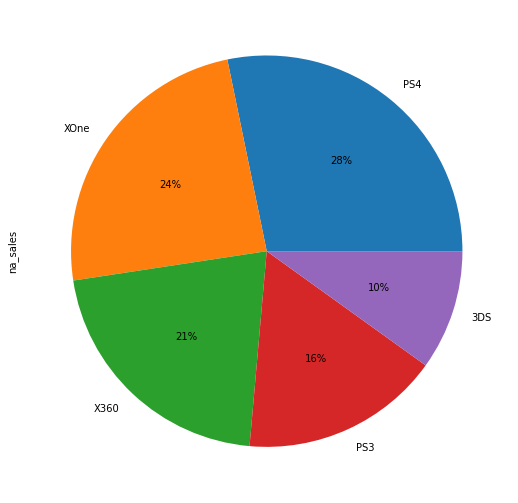

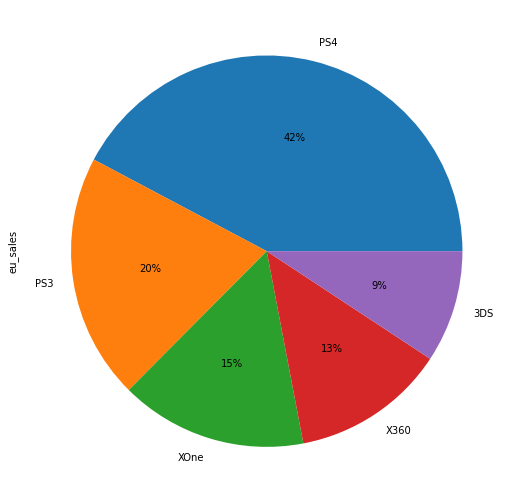

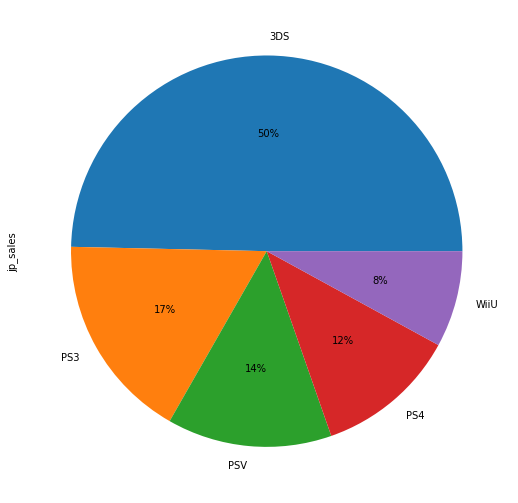

In [36]:
region = 'na_sales'
draws_graph(sorted_region('platform'))

region = 'eu_sales'
draws_graph(sorted_region('platform'))

region = 'jp_sales'
draws_graph(sorted_region('platform'))


<div>🔸В Северной Америке лидируют PS4, XOne и X360, в Европе PS4. 
<br>🔸В в Японии 50% рынка занимает 3DS, а PS4 занимает лишь 12% </div>

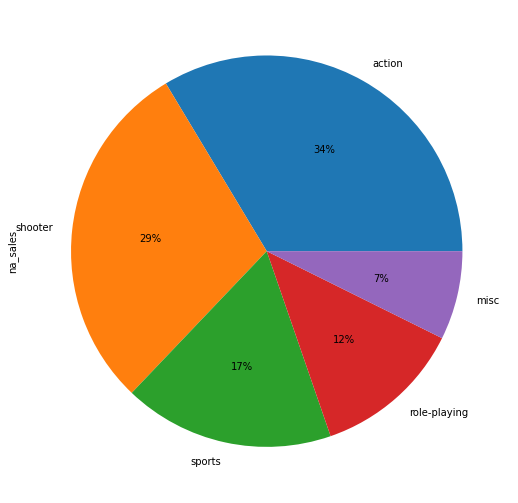

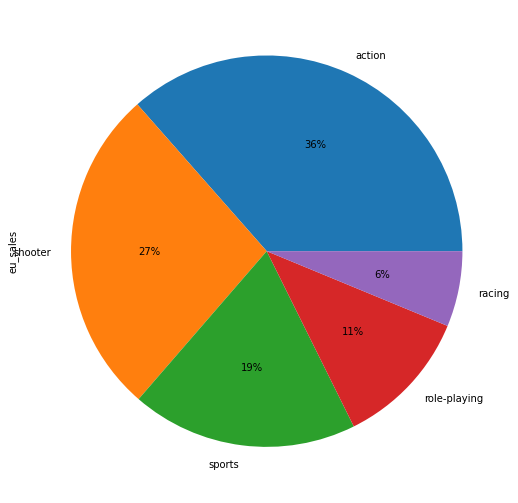

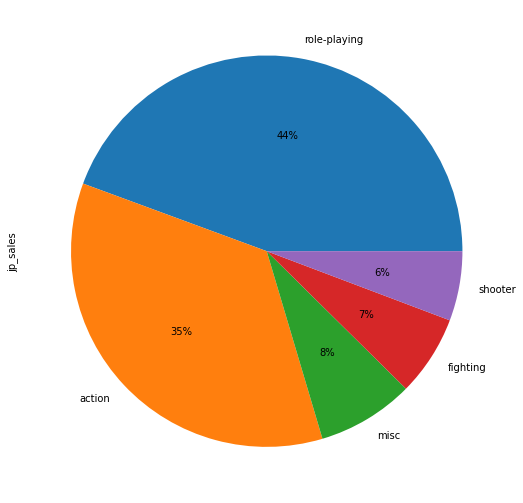

In [37]:
region = 'na_sales'
draws_graph(sorted_region('genre'))

region = 'eu_sales'
draws_graph(sorted_region('genre'))

region = 'jp_sales'
draws_graph(sorted_region('genre'))

<div>🔸По жанрам в Северной Америке и Европе на вершинах популярности экшн, шутеры и в попытках догнать их - спортивные игры.
<br>🔸Япония снова отличилась, и первое место по жанрам у нее занимают ролевые игры. На втором уже наш любимый экшн, а вот шутеры занимают всего 6% рынка </div>

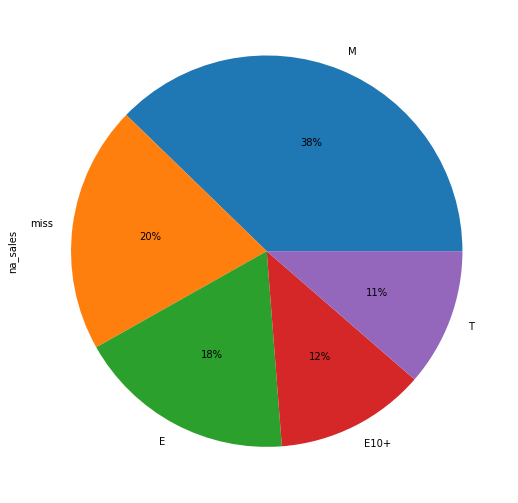

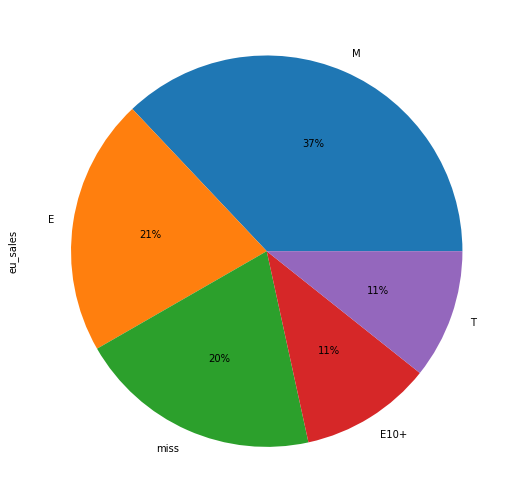

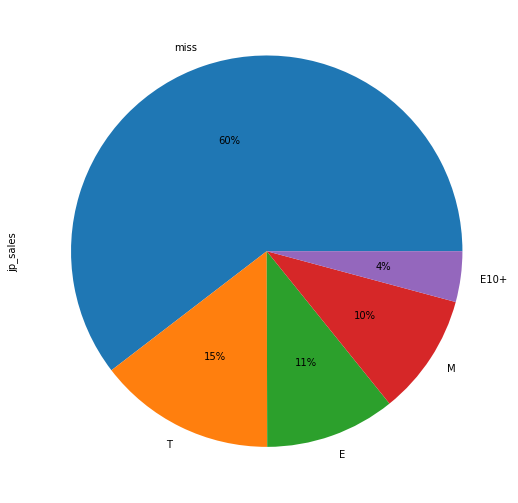

In [38]:
region = 'na_sales'
draws_graph(sorted_region('rating'))

region = 'eu_sales'
draws_graph(sorted_region('rating'))

region = 'jp_sales'
draws_graph(sorted_region('rating'))

<div>🔸В рейтингах у Северной Америки и Европы большую часть рынка занимает возрастная категория «M» — «От 17 лет». Далее идут расхождения. На втором и третьем месте у Северной Америки рейтинги «miss» и «E». У Европы второе и третье место заняли наоборот «E» и miss»
<br>🔸В Японии же первое место занимает категория «miss», из-за большого количества неоцененных ESRB игр Nintendo </div>

### ✅ Вывод:
* По регионам популярными платформами все так же остаются PS4 и XOne, а вот для японских пользователей следует отметить 3DS
* Следующие жанры являются самыми продаваемыми: экшн, шутеры и ролевые игры
* Идеальный портрет пользователя Северной Америки: играет на платформах PS4 и XOne в экшн, шутеры и спортивные игры в категориях «M» и «miss»
* Идеальный портрет европейского пользователя: играет на платформе PS4 в экшн, шутеры и спортивные игры в категориях «M» и «E»
* Идеальный портрет японского пользователя: играет на платформе 3DS в ролевые игры и экшн в категории «miss»

## Проверка гипотез

* Нулевая гипотеза подразумевает знак равенства, альтернативная же либо неравенство, либо больше / меньше. В наших двух гипотезах альтернативная будет неравенством
* Обе гипотезы будем проверять двусторонним t-тестом с проверкой равенства дисперсий. Двусторонний - потому что нам не важно в большую или меньшую сторону будет отклонение от нулевой гипотезы. Критический уровень значимости поставим 5%, потому что нам не важна ультраточность

<div><strong>H₀</strong>: Средние пользовательские рейтинги платформ Xbox One и PC равны
<br><strong>H₁</strong>: Средние пользовательские рейтинги платформ Xbox One и PC не равны</div>

In [39]:
sample_1 = data_after_2013.query('platform == "XOne"')['user_score'].dropna()
sample_2 = data_after_2013.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05 # поставим 5%, потому что нам не нужна максимальная точность

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<div><strong>H₀</strong>: Средние пользовательские рейтинги жанров Action и Sports равны
<br><strong>H₁</strong>: Средние пользовательские рейтинги жанров Action и Sports не равны</div>

In [40]:
sample_1 = data_after_2013.query('genre == "action"')['user_score'].dropna()
sample_2 = data_after_2013.query('genre == "sports"')['user_score'].dropna()

alpha = 0.05 # поставим 5%, потому что нам не нужна максимальная точность

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


### ✅ Вывод:
* Средние пользовательские рейтинги платформ Xbox One и PC равны
* Средние пользовательские рейтинги жанров Action и Sports не равны

## Общий вывод

<div><br>🔹 Данные были не достаточно тщательно подготовлены, имеется большое количество пропусков (более 40%). Их причинами являются: 
<br> 1. Наличие в Европе и Японии своих организаций, которые занимаются возрастными рейтингами, а именно PEGI и CERO. По возможности стоит добавить столбцы с этими рейтингами в данный датасет
<br>2. До ESRB рейтинги видеоигр были на уровне производителей консолей. В то время Nintendo не оценивала игры, но имела репутацию цензуры игр, чтобы сделать их удобными для семьи. Поэтому у игр на Nintendo-платформе есть пропуски в рейтинге ESRB.
    <br>
<br>🔹 Была проведена предобработка данных, в которой:
<br>    - Были заполнены пропуски там, где это возможно
<br>    - Удалены дубликаты
<br>    - Была заменена возрастная категория на актуальную
<br>    - Столбцы были преобразованы в нужный тип данных
<br>   - Создан столбец с суммарными продажами
    <br>
<br>🔹 Был произведен исследовательский анализ, по итогам которого вынесены следующие выводы :
<br>    - С 1980 по 2016 годы было выпущено 11559 игр
<br>    - Так как многие платформы уже ушли с рынка, то актульный период определен с 2013 года
<br>    - В топ-5 продаваемых платформ за 2013-2016 годы входят PS2, X360, PS3, Wii, DS
<br>    - Примерный срок актуальности платформы 8 лет
<br>    - На успех игры на рынке сильнее влияют оценки критиков, чем оценки игроков, но прямой взаимосвязи количества продаж от оценок не наблюдается
<br>    - В топ-3 продаваемых жанра входит шутер, спортивные игры и платформеры
<br>    - Шутеры, несмотря на небольшое количество игр, являются перспективным жанром для продаж, а паззлы наоборот, самый малочисленный не прибыльный жанр
    <br>
<br>🔹 В результатах проверки гипотез были выведены следующие предположения:
<br>   - Средние пользовательские рейтинги платформ Xbox One и PC равны
<br>   - Средние пользовательские рейтинги жанров Action и Sports не равны
    <br>

<br>🔹 Для успешной рекламной кампании на 2017 год в Северной Америке и Европе необходимо учесть следующее:
<br>📌 Так как средний срок жизни платформы 8 лет, то следует обратить внимание на платформы выпущенные после 2013 года, а именно PS4 и Xbox One. Лидерами продаж являются игры с жанром шутер и спортивные с возрастной категорией «M» (от 17 лет) и «E» (для всех), в 2017 году они продолжат удерживать актуальность среди пользователей
<br>📌 Рынок Японии значительно отличается от Северной Америки и Европы, поэтому для японских пользователей нужно планировать отдельную кампанию. Перспективной платформой будет 3DS, жанр ролевые игры, рейтинг ESRB учитывать не стоит </div>
